In [159]:
import warnings
warnings.filterwarnings("ignore")
from gapminder import gapminder
print(f"* Number of observations: {gapminder.shape[0]}")
gapminder.sample(3)

* Number of observations: 1704


,country,continent,year,lifeExp,pop,gdpPercap
194,Burkina Faso,Africa,1962,37.814,4919632,722.512021
701,India,Asia,1977,54.208,634000000,813.337323
378,Croatia,Europe,1982,70.460,4413368,13221.821840


----------

# 2. Variable types

`EDA` involves summarizing and visualizing data to uncover patterns, detect anomalies, and understand relationships between variables. Statistical summaries, such as mean, median, and standard deviation, are essential tools in this process.

- Which variables are considered quantitative and which are qualitative? 

> Hint: You can check the default column types by using `gapminder.dtypes`. But this may not be accurate because some categorical data may be encoded using numerical values.

In [160]:
gapminder.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [161]:
print(f'Qualitative data are {list(gapminder.select_dtypes(exclude="number").columns)}')
print(f'Quantitative data are {list(gapminder.select_dtypes(include="number").columns)}')

Qualitative data are ['country', 'continent']
Quantitative data are ['year', 'lifeExp', 'pop', 'gdpPercap']


## 2.1 Quantitative variables

1. In year 2002, 
- Compute suitable statistics for each quantitative variable (excluding `year`) to obtain an overall summary.
- Recall the definitions of **skewness** and **kurtosis** introduced in the course. 
- Compute these metrics for each quantitative variable and explain the distribution of each variable based on these values.

In [162]:
# To do
gapminder.drop(columns='year').describe().style.background_gradient()

,lifeExp,pop,gdpPercap
count,1704.000000,1704.000000,1704.000000
mean,59.474439,29601212.324531,7215.327081
std,12.917107,106157896.743915,9857.454543
min,23.599000,60011.000000,241.165876
25%,48.198000,2793664.000000,1202.060309
50%,60.712500,7023595.500000,3531.846988
75%,70.845500,19585221.750000,9325.462346
max,82.603000,1318683096.000000,113523.132900


2. Graphically represent the distribution of each variable for the year $2002$. After plotting the distributions, provide a brief explanation for each variable.

In [163]:
df2002 = gapminder.query('year==2002')
df2002.drop(columns=['year'], inplace=True)

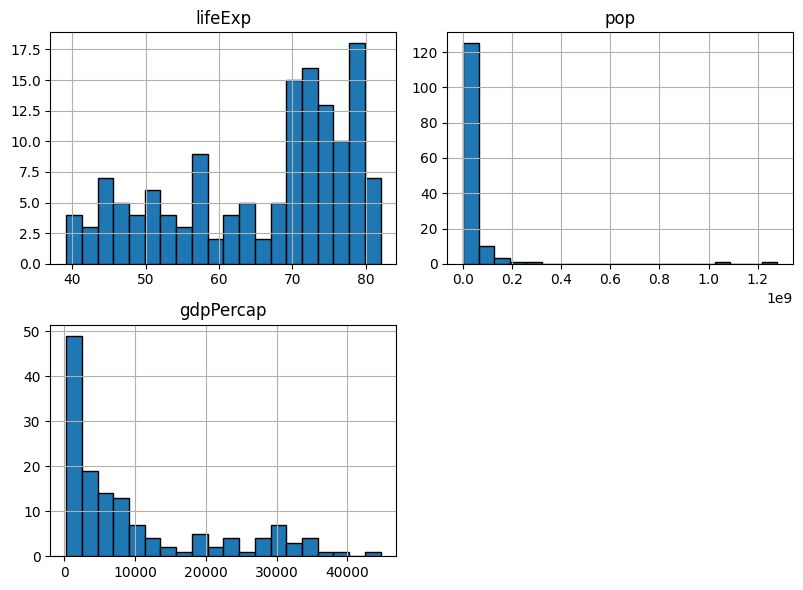

In [164]:
import matplotlib.pyplot as plt

df2002.hist(figsize=(8,6), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

3. According to the data, in 2002:
- Which country is the richest? 
- Which country is the poorest?
- Which country is the healthiest?
- Which country is the unhealthiest?

In [165]:
gdp_min = df2002['gdpPercap'].min()
gdp_max = df2002['gdpPercap'].max()

In [166]:
richest = df2002.query('gdpPercap == @gdp_max')
poorest = df2002.query('gdpPercap == @gdp_min')

In [167]:
print (f"Richest Country in 2002 is {richest['country'].values[0]}\n")
print (f"Poorest Country in 2002 is {poorest['country'].values[0]}")

Richest Country in 2002 is Norway

Poorest Country in 2002 is Congo, Dem. Rep.


4. Repeat the previous question for the year 1977. Before computing, can you guess which country had the lowest life expectancy around that year?

In [168]:
data1977 = gapminder.query('year==1977').drop(columns='year')

In [169]:
lowest_life_exp_min = data1977['lifeExp'].min()
lowest_life_exp = data1977.query('lifeExp == @lowest_life_exp_min')
print(f"Country with the lowest life expectancy in 1977 is **{lowest_life_exp['country'].values[0]}** with **{lowest_life_exp_min}** years")

Country with the lowest life expectancy in 1977 is **Cambodia** with **31.22** years


In [170]:
gdp_min = data1977['gdpPercap'].min()
gdp_max = data1977['gdpPercap'].max()

richest = data1977.query('gdpPercap == @gdp_max')
poorest = data1977.query('gdpPercap == @gdp_min')

print(f"Richest Country in 1977 is **{richest['country'].values[0]}**")
print(f"Poorest Country in 1977 is **{poorest['country'].values[0]}**")

Richest Country in 1977 is **Kuwait**
Poorest Country in 1977 is **Myanmar**


## 2.2. Qualitative variables

Qualitative variables are simpler than the quantitative ones, as we primarily focus on the proportion or frequency of each category. In our dataset, the existing qualitative variables are not suitable for analysis because they are repeated each year. Therefore, we will create three new qualitative variables associated with the three quantitative columns by copping them into three categories each.

In year 2002,

1. Add the following three variables to the `gapminder` dataset by grouping each quantitative variable into $3$ groups.
- Create variable `gdpQual` with three categories: [**"developing"**, **"moderate"**, **"developed"**] using variable `gdpPercap`.
- Create variable `popQual` with three categories: [**"small"**, **"medium"**, **"large"**] using variable `pop`.
- Create variable `lifeExpQual` with three categories: [**"unhealthy"**, **"moderate"**, **"healthy"**] using variable `lifeExp`.

> Hint: you may find `pd.cut` function helpful.

In [171]:
import pandas as pd
df = gapminder.copy()
df["gdpQual"] = pd.cut(df['gdpPercap'], bins=3, labels=["developing", "moderate", "developed"])
df["popQual"] = pd.cut(df['pop'], bins=3, labels=["small", "medium", "large"])
df["lifeExpQual"] = pd.cut(df['lifeExp'], bins=3, labels=["unhealthy", "moderate", "healthy"])

2. Compute the appropriate statistical values and graphically represent the distribution of each newly created qualitative variable.

In [172]:
count_gdpQual = df.gdpQual.value_counts()
count_popQual = df.popQual.value_counts()
count_lifeExpQual = df.lifeExpQual.value_counts()

print("="*50)
print(count_gdpQual)
print("="*50)
print(count_popQual)
print("="*50)
print(count_lifeExpQual)
print("="*50)

gdpQual
developing    1688
moderate        11
developed        5
Name: count, dtype: int64
popQual
small     1682
medium      12
large       10
Name: count, dtype: int64
lifeExpQual
healthy      785
moderate     685
unhealthy    234
Name: count, dtype: int64


In [173]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap',
       'gdpQual', 'popQual', 'lifeExpQual'],
      dtype='object')

In [174]:
pd.crosstab(df['gdpQual'], df['popQual']).style.background_gradient()

popQual,small,medium,large
gdpQual,,,
developing,1666,12,10
moderate,11,0,0
developed,5,0,0


In [175]:
pd.crosstab(df['gdpQual'], df['lifeExpQual']).style.background_gradient()

lifeExpQual,unhealthy,moderate,healthy
gdpQual,,,
developing,234,682,772
moderate,0,0,11
developed,0,3,2


In [176]:
pd.crosstab(df['popQual'], df['lifeExpQual']).style.background_gradient()

lifeExpQual,unhealthy,moderate,healthy
popQual,,,
small,234,672,776
medium,0,11,1
large,0,2,8


- Graphically represent them and describe the graph.

In [177]:
count_gdpQual = df.gdpQual.value_counts(normalize=True)
count_popQual = df.popQual.value_counts(normalize=True)
count_lifeExpQual = df.lifeExpQual.value_counts(normalize=True)

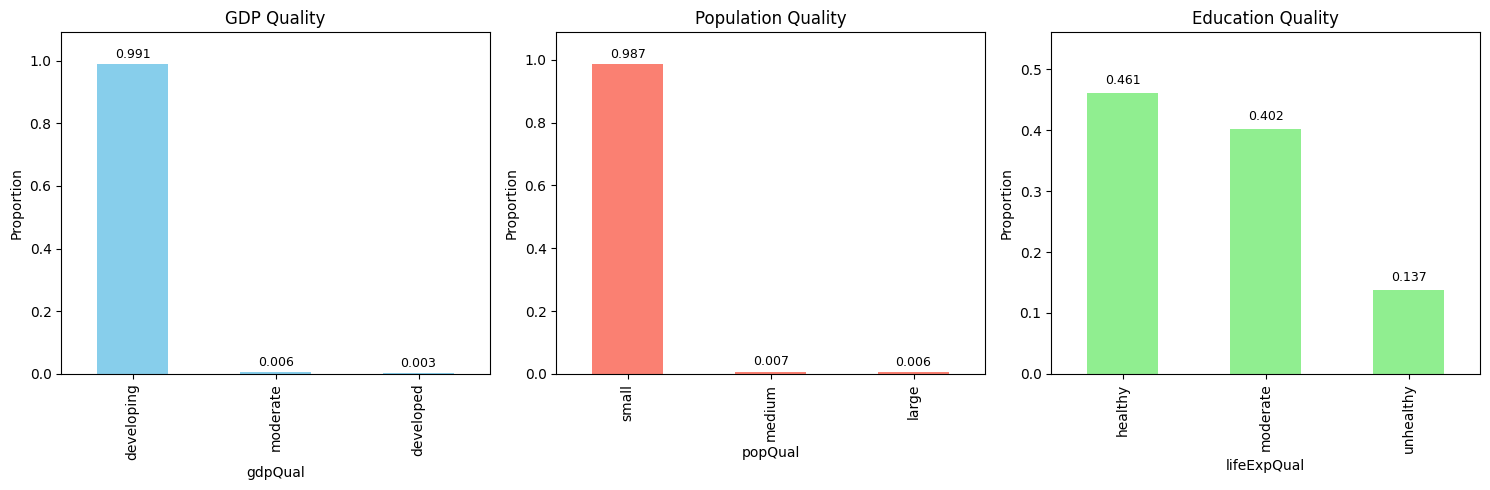

In [178]:
series_list = [count_gdpQual, count_popQual, count_lifeExpQual]
titles = ['GDP Quality', 'Population Quality', 'Education Quality']
colors = ["skyblue", "salmon", "lightgreen"]

fig, axes = plt.subplots(1, 3, figsize=(15,5))

for ax, s, title, color in zip(axes, series_list, titles, colors):
    s.plot(kind='bar', ax=ax, color=color)
    ax.set_title(title)
    ax.set_ylabel('Proportion')
    ax.set_ylim(0, s.max() + 0.1)  

    for i, val in enumerate(s):
        ax.text(i, val + 0.01, f"{val:.3f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

---------

# 3. Time evolution

`Gapminder` captures global changes from $1952$ to $2007$. It is more insightful to examine how these variables evolve over time.

## 3.1. Evolution of quantitative columns

1. Create a line plot of `lifeExp` for the five continents from $1952$ to $2007$ using `sns.lineplot`. What observations can you make from the plot?

In [179]:
df.continent.unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [180]:
asia = df[df['continent'] == 'Asia']
mean_lifeExp_asia = asia.groupby('year')['lifeExp'].mean()

europe = df[df['continent'] == 'Europe']
mean_lifeExp_europe = europe.groupby('year')['lifeExp'].mean()

africa = df[df['continent'] == 'Africa']
mean_lifeExp_africa = africa.groupby('year')['lifeExp'].mean()

america = df[df['continent'] == 'Americas']
mean_lifeExp_america = america.groupby('year')['lifeExp'].mean()

oceania = df[df['continent'] == 'Oceania']
mean_lifeExp_oceania = oceania.groupby('year')['lifeExp'].mean()

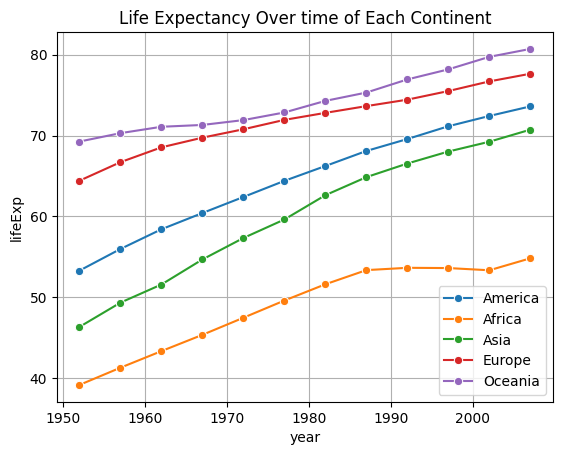

In [181]:
import seaborn as sns

sns.lineplot(mean_lifeExp_america, label="America", marker="o")
sns.lineplot(mean_lifeExp_africa, label="Africa", marker="o")
sns.lineplot(mean_lifeExp_asia, label="Asia", marker="o")
sns.lineplot(mean_lifeExp_europe, label="Europe", marker="o")
sns.lineplot(mean_lifeExp_oceania, label="Oceania", marker="o")
plt.grid()
plt.legend()
plt.title("Life Expectancy Over time of Each Continent")
plt.show()

2. Repeat the same process with `pop`, and then with `gdpPercap`. Provide your comments for each case.

In [182]:
asia = df[df['continent'] == 'Asia']
mean_pop_asia = asia.groupby('year')['pop'].mean()

europe = df[df['continent'] == 'Europe']
mean_pop_europe = europe.groupby('year')['pop'].mean()

africa = df[df['continent'] == 'Africa']
mean_pop_africa = africa.groupby('year')['pop'].mean()

america = df[df['continent'] == 'Americas']
mean_pop_america = america.groupby('year')['pop'].mean()

oceania = df[df['continent'] == 'Oceania']
mean_pop_oceania = oceania.groupby('year')['pop'].mean()

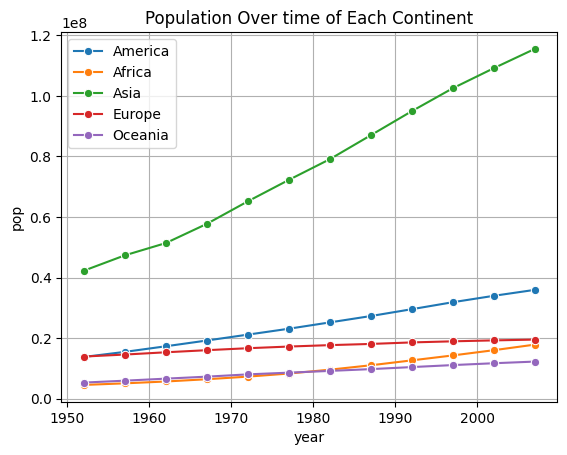

In [183]:
sns.lineplot(mean_pop_america, label="America", marker="o")
sns.lineplot(mean_pop_africa, label="Africa", marker="o")
sns.lineplot(mean_pop_asia, label="Asia", marker="o")
sns.lineplot(mean_pop_europe, label="Europe", marker="o")
sns.lineplot(mean_pop_oceania, label="Oceania", marker="o")
plt.grid()
plt.legend()
plt.title("Population Over time of Each Continent")
plt.show()

In [184]:
asia = df[df['continent'] == 'Asia']
mean_gdpPercap_asia = asia.groupby('year')['gdpPercap'].mean()

europe = df[df['continent'] == 'Europe']
mean_gdpPercap_europe = europe.groupby('year')['gdpPercap'].mean()

africa = df[df['continent'] == 'Africa']
mean_gdpPercap_africa = africa.groupby('year')['gdpPercap'].mean()

america = df[df['continent'] == 'Americas']
mean_gdpPercap_america = america.groupby('year')['gdpPercap'].mean()

oceania = df[df['continent'] == 'Oceania']
mean_gdpPercap_oceania = oceania.groupby('year')['gdpPercap'].mean()

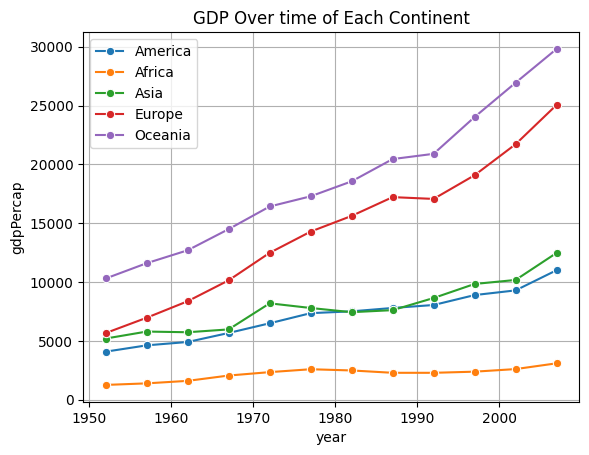

In [185]:
sns.lineplot(mean_gdpPercap_america, label="America", marker="o")
sns.lineplot(mean_gdpPercap_africa, label="Africa", marker="o")
sns.lineplot(mean_gdpPercap_asia, label="Asia", marker="o")
sns.lineplot(mean_gdpPercap_europe, label="Europe", marker="o")
sns.lineplot(mean_gdpPercap_oceania, label="Oceania", marker="o")
plt.grid()
plt.legend()
plt.title("GDP Over time of Each Continent")
plt.show()

3. Plot the evolution of each of the three quantitative variables for **Cambodia** vs **Thailand**. Describe the graphs.

In [186]:
kh = df[df['country'] == 'Cambodia']
th = df[df['country'] == 'Thailand']

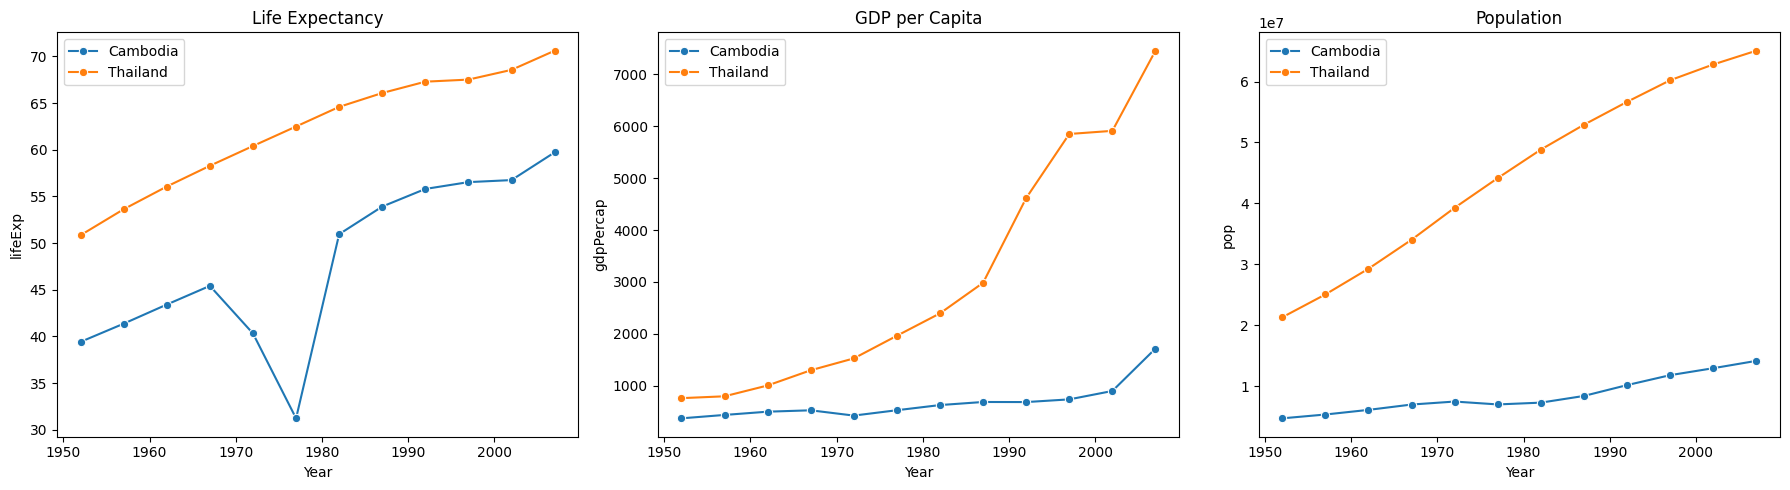

In [187]:
variables = ["lifeExp", "gdpPercap", "pop"]
titles = ["Life Expectancy", "GDP per Capita", "Population"]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, var, title in zip(axes, variables, titles):
    sns.lineplot(data=kh, x='year', y=var, ax=ax, label="Cambodia", marker="o")
    sns.lineplot(data=th, x='year', y=var, ax=ax, label="Thailand", marker="o")
    ax.set_title(title)
    ax.set_xlabel("Year")
    ax.set_ylabel(var)
    ax.legend()

plt.tight_layout()
plt.show()


## 3.2. Evolution of qualitative columns

1. Visualize the evolution of `lifeExpQual` column in **Asia** from 1952 to 2007. What do you observe?

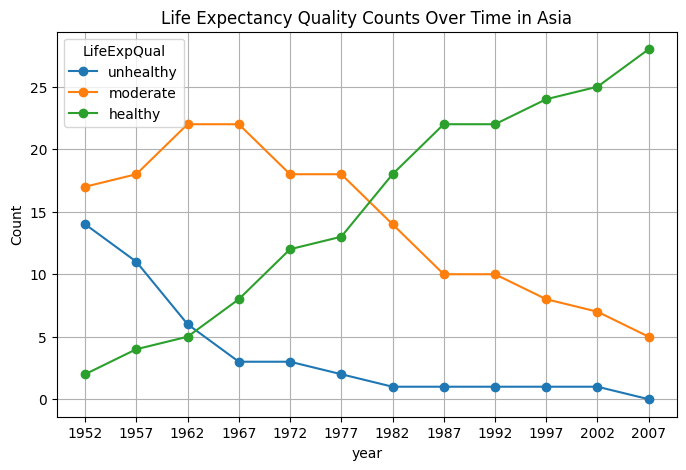

In [188]:
leq = asia.groupby('year')['lifeExpQual'].value_counts()
f = leq.unstack(level='lifeExpQual')
f.plot(kind='line', marker='o', figsize=(8,5))
plt.ylabel('Count')
plt.title('Life Expectancy Quality Counts Over Time in Asia')
plt.xticks(f.index)  
plt.legend(title='LifeExpQual')
plt.grid(True)
plt.show()

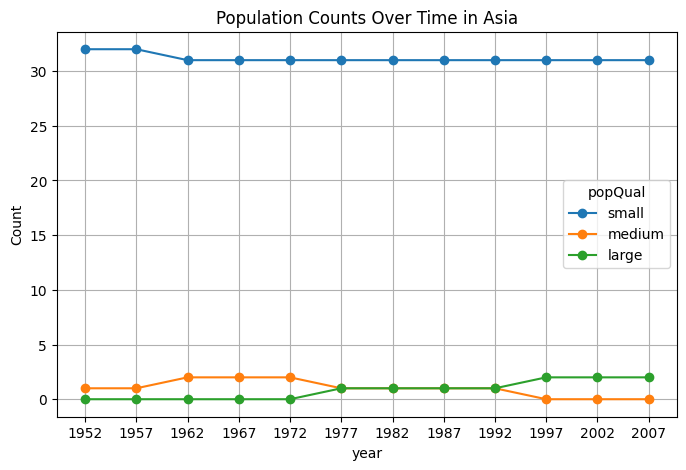

In [189]:
pq = asia.groupby('year')['popQual'].value_counts()
f = pq.unstack(level='popQual')
f.plot(kind='line', marker='o', figsize=(8,5))
plt.ylabel('Count')
plt.title('Population Counts Over Time in Asia')
plt.xticks(f.index)  
plt.legend(title='popQual')
plt.grid(True)
plt.show()

3. Visualize the evolution of the three qualitative columns above for African countries from 1952 to 2007.

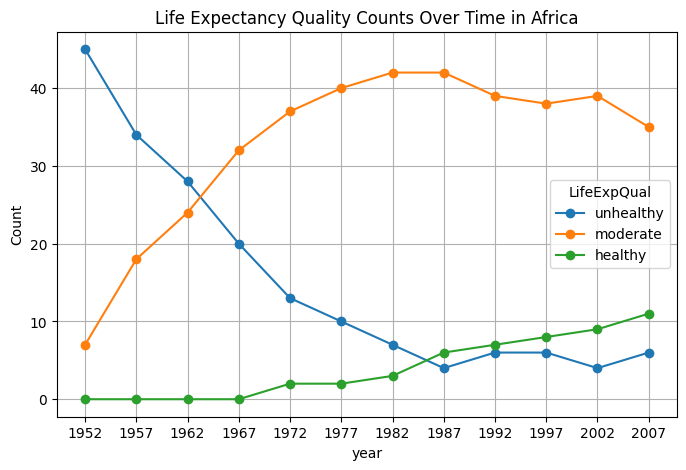

In [191]:
leq = africa.groupby('year')['lifeExpQual'].value_counts()
f = leq.unstack(level='lifeExpQual')
f.plot(kind='line', marker='o', figsize=(8,5))
plt.ylabel('Count')
plt.title('Life Expectancy Quality Counts Over Time in Africa')
plt.xticks(f.index)  
plt.legend(title='LifeExpQual')
plt.grid(True)
plt.show()

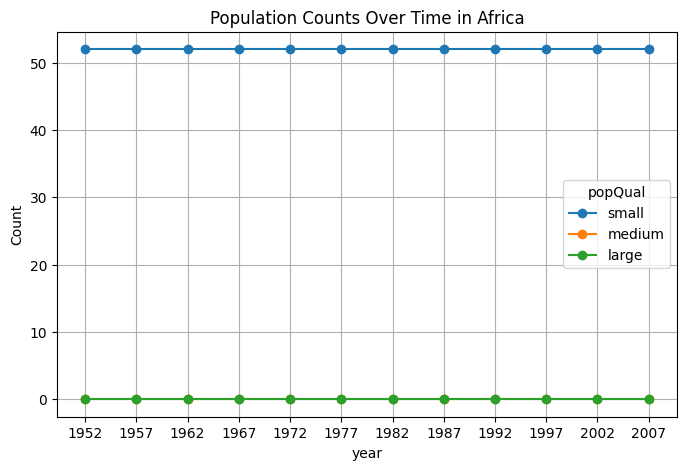

In [192]:
pq = africa.groupby('year')['popQual'].value_counts()
f = pq.unstack(level='popQual')
f.plot(kind='line', marker='o', figsize=(8,5))
plt.ylabel('Count')
plt.title('Population Counts Over Time in Africa')
plt.xticks(f.index)  
plt.legend(title='popQual')
plt.grid(True)
plt.show()

# Further readings
- Gapminder documentation: [https://www.gapminder.org/data/documentation/](https://www.gapminder.org/data/documentation/)
- A short demonstration video is available here: [Hans Rosling's 200 Countries, 200 Years, 4 Minutes - The Joy of Stats - BBC Four](https://youtu.be/jbkSRLYSojo?si=qipg08VIi999hEgo).
- Graphical tools:
    - [`matplotlib`](https://matplotlib.org/stable/index.html)
    - [`seaborn`](https://seaborn.pydata.org/)
    - [`https://plotly.com/python/`](https://plotly.com/python/)